<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Distributions_%26_Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normal Distribution

In [ ]:
#(x,mean,std)
#P(x < 70)

stats.norm.cdf(70,60,10)

#84% of information is less than 70

0.8413447460685429

In [ ]:
#P(x<680)

stats.norm.cdf(680,711,29)

0.14254260383881612

In [ ]:
#P(697 <= X <= 740)

stats.norm.cdf(740,711,29) - stats.norm.cdf(697,711,29)

#52.67% of information lies between 697 and 740

0.5267111786415019

* CASE STUDY : Stock Price

In [ ]:
beml = pd.read_csv("/content/BEML.csv")
glaxo = pd.read_csv("/content/GLAXO.csv")

In [ ]:
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [ ]:
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


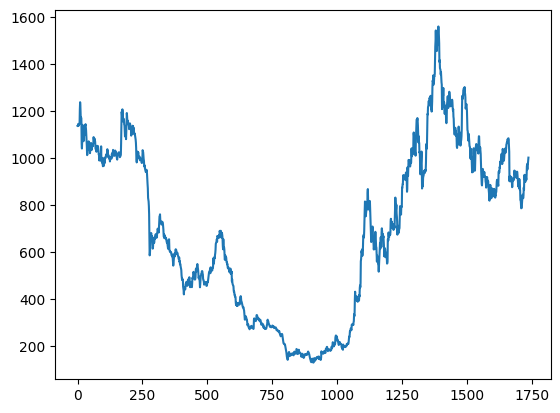

In [ ]:
plt.plot(beml['Close'])

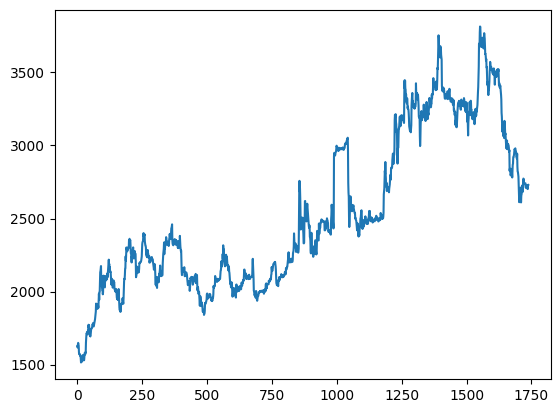

In [ ]:
plt.plot(glaxo['Close'])

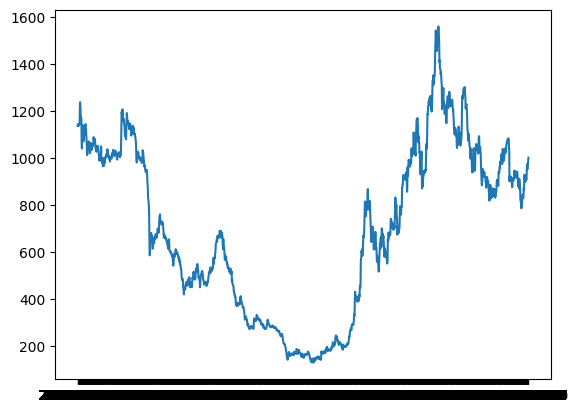

In [ ]:
plt.plot(beml["Date"],beml["Close"])
#overlapping dates

In [ ]:
beml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1739 non-null   object 
 1   Open                  1739 non-null   float64
 2   High                  1739 non-null   float64
 3   Low                   1739 non-null   float64
 4   Last                  1739 non-null   float64
 5   Close                 1739 non-null   float64
 6   Total Trade Quantity  1739 non-null   float64
 7   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(7), object(1)
memory usage: 108.8+ KB


In [ ]:
beml1 = beml[["Date","Close"]]

In [ ]:
glaxo1 = glaxo[["Date","Close"]]

In [ ]:
beml1.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [ ]:
#converting object to DateTime

In [ ]:
beml1 = beml1.set_index(pd.DatetimeIndex(beml1["Date"]))

In [ ]:
glxo1 = glaxo1.set_index(pd.DatetimeIndex(glaxo1["Date"]))

In [ ]:
beml1

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


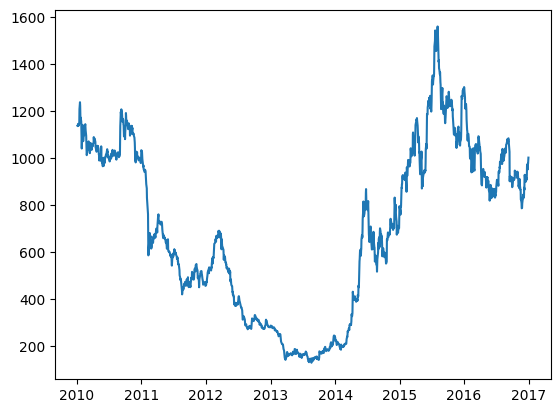

In [ ]:
plt.plot(beml1['Close'])
#overlapping resolved

In [ ]:
glaxo1.head()

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80


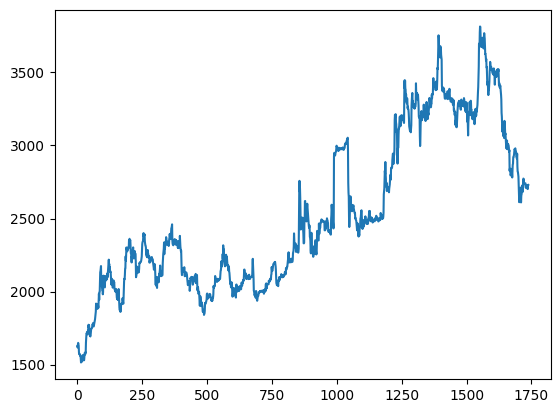

In [ ]:
plt.plot(glaxo1['Close'])

In [ ]:
beml1

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [ ]:
#Get a Gain column of stock price

beml1['gain'] = beml1["Close"].pct_change(periods=1)
glaxo1['gain'] = glaxo1["Close"].pct_change(periods=1)

<ipython-input-26-b499f56b7350>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glaxo1['gain'] = glaxo1["Close"].pct_change(periods=1)


In [ ]:
beml1.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087


In [ ]:
glaxo1.head()

,Date,Close,gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398


In [ ]:
#To remove missing value

beml1.dropna(inplace=True)
glaxo1.dropna(inplace=True)

<ipython-input-29-8ecadc2da96e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glaxo1.dropna(inplace=True)


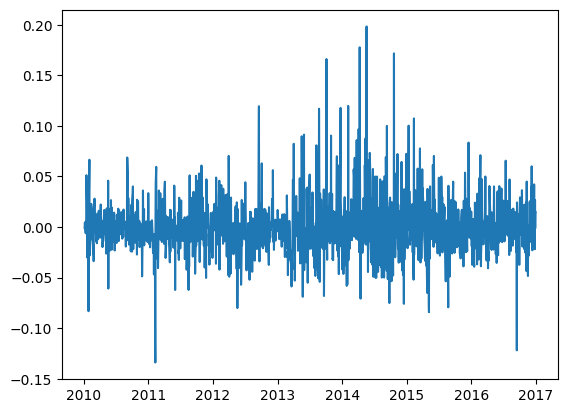

In [ ]:
plt.plot(beml1['gain'])

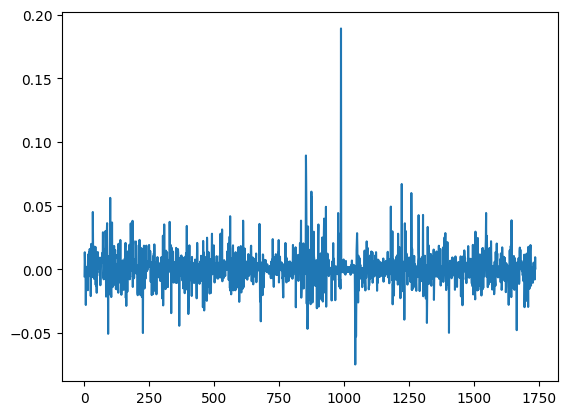

In [ ]:
plt.plot(glaxo1['gain'])

<ipython-input-32-d0ac1e9dbd1a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beml1['gain'])


<Axes: xlabel='gain', ylabel='Density'>

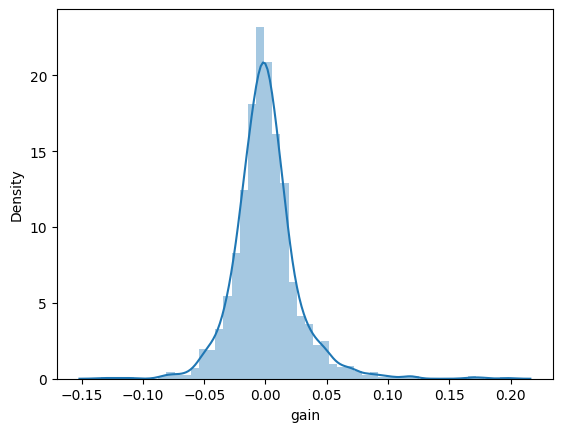

In [ ]:
#Distribution plot
sns.distplot(beml1['gain'])

<ipython-input-33-1b999e05d4ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glaxo1['gain'])


<Axes: xlabel='gain', ylabel='Density'>

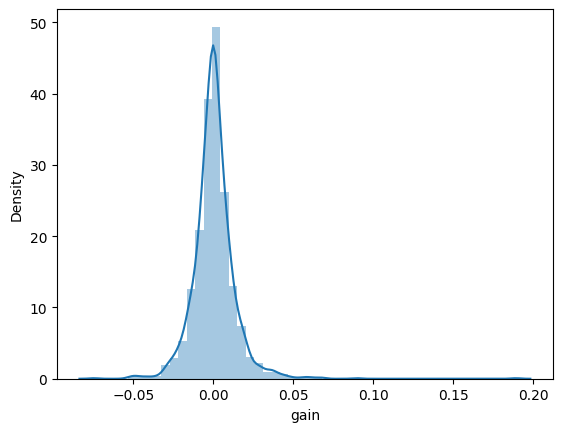

In [ ]:
sns.distplot(glaxo1['gain'])

In [ ]:
#ignore warnings if any
import warnings
warnings.filterwarnings('ignore')

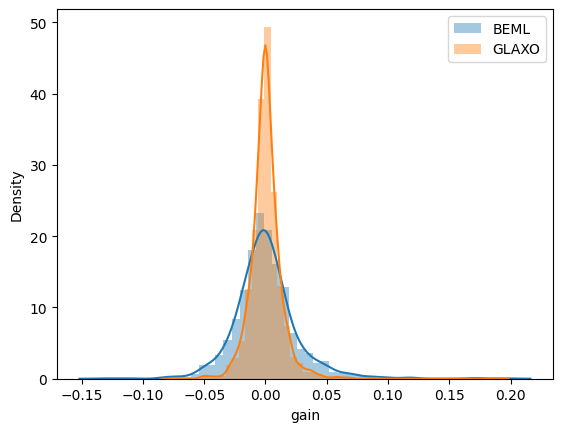

In [ ]:
sns.distplot(beml1["gain"],label="BEML")
sns.distplot(glaxo1["gain"],label="GLAXO")
plt.legend()
plt.show()

* BEML stock have higher variance/spread than GLAXO,So BEML have higher risk & more gain

In [ ]:
#mean & Standard deviation(S.D.) for BEML

beml_mean = beml1['gain'].mean()
print("The mean of BEML gain is :",round(beml_mean,5))

beml_std = beml1['gain'].std()
print("The S.D. of BEML gain is :",round(beml_std,5))

The mean of BEML gain is : 0.00027
The S.D. of BEML gain is : 0.02643


In [ ]:
#mean & Standard deviation(S.D.) for GLAXO

glaxo_mean = glaxo1['gain'].mean()
print("The mean of GLAXO gain is :",round(glaxo_mean,5))

glaxo_std = glaxo1['gain'].std()
print("The S.D. of GLAXO gain is :",round(glaxo_std,5))

The mean of GLAXO gain is : 0.00039
The S.D. of GLAXO gain is : 0.01336


*  2% loss or higher

In [ ]:
stats.norm.cdf(-0.02,beml_mean,beml_std)
#There is a 22.2 % probability of incurring 2% loss or higher in BEML

0.22155987503755292

In [ ]:
stats.norm.cdf(-0.02,glaxo_mean,glaxo_std)
#There is a 6 % probability of incurring 2% loss or higher in GLAXO

0.06352488667177401

* 2 % gains or higher

In [ ]:
1 - stats.norm.cdf(0.02,beml_mean,beml_std)
#There is 22.7 % chance that it will give gains higher than 2% in BEML Stock

0.22769829484075355

In [ ]:
1 - stats.norm.cdf(0.02,glaxo_mean,glaxo_std)
#There is 7 % chance that it will give gains higher than 2% in GLAXO Stock

0.07104511457618568

# Confidence Interval

In [ ]:
#Confidence interval using z-distribution
#stats.norm.interval(confidence level, sample mean, (Population S.D.)/sqrt(n))

In [ ]:
nb = len(beml1)
ng = len(glaxo1)

In [ ]:
#For 95% confidence level
stats.norm.interval(0.95,beml_mean,beml_std/np.sqrt(nb))

(-0.0009718595923675368, 0.0015133557504820021)

In [ ]:
#For 90%
stats.norm.interval(0.90,beml_mean,beml_std/np.sqrt(nb))

(-0.0007720811521647894, 0.0013135773102792543)

In [ ]:
stats.norm.interval(0.95,glaxo_mean,glaxo_std/np.sqrt(nb))

(-0.00024208549447730026, 0.0010141676596618836)

In [ ]:
#Confidence interval using t-distribution
#stats.t.interval(confidence level, sample size - 1 ,sample mean, sample S.D.)
#For 95%

stats.t.interval(0.95,nb-1,beml_mean,beml_std)

(-0.05156885177136778, 0.05211034792948225)